In [42]:
import csv
from textblob import TextBlob
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [43]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()

In [44]:
File = pd.read_csv('Twitter.csv')

In [45]:
# File

In [46]:
# File['Text']

In [47]:
File["Compound"] = ""
File["Postivity"] = ""
File["Negativity"] = ""
File["Neutral"] = ""
File["Polarity"] = ""
File["Subjectivity"] = ""

In [48]:
File.head()

,Tweet Count,Status,ico,tweet,Compound,Postivity,Negativity,Neutral,Polarity,Subjectivity
0,0,Successful,tezos,Did you participated in Tezos? Already locked ...,,,,,,
1,1,Successful,tezos,#Ethereum Co-Founder Takes to Twitter to Disag...,,,,,,
2,2,Successful,tezos,Will this drive the XRP value up? #cryptocurre...,,,,,,
3,3,Successful,tezos,@CamiRusso and I just met with the CEO of @Ri...,,,,,,
4,4,Successful,tezos,Check out my latest Flux episode- on bitcoins ...,,,,,,


In [49]:
for index,row in File.iterrows():
#     print(row)
    sentence = row['tweet']
#     print(sentence)
    blob = TextBlob(sentence)
#     print("Polarity: ", blob.sentiment.polarity, "Subjectivity: ",blob.sentiment.subjectivity)
    compound = analyzer.polarity_scores(row['tweet'])["compound"]
    pos = analyzer.polarity_scores(row['tweet'])["pos"]
    neu = analyzer.polarity_scores(row['tweet'])["neu"]
    neg = analyzer.polarity_scores(row['tweet'])["neg"]
#     print("Compound: ", compound, "Positivity: ", pos, "Neutral: ", neu, "Negative: ",neg)
    
    
    
    
    File.set_value(index, "Polarity", blob.sentiment.polarity)
    File.set_value(index, "Subjectivity", blob.sentiment.subjectivity)
    File.set_value(index, "Compound", compound)
    File.set_value(index, "Postivity", pos)
    File.set_value(index, "Negativity", neu)
    File.set_value(index, "Neutral", neg)


In [50]:
File.tail()

,Tweet Count,Status,ico,tweet,Compound,Postivity,Negativity,Neutral,Polarity,Subjectivity
9767,9768,Failure,akasha,b\xec\x83\x88\xed\x95\xb4 \xec\xb2\xab\xeb\x82...,0,0,1,0,0,0
9768,9769,Failure,akasha,"b""Thanks for following, Wayne. Love this. If y...",0.9299,0.444,0.556,0,0.4,0.45
9769,9770,Failure,akasha,b\xec\x8a\x88\xeb\xb0\xa4\xeb\xb0\x94\xeb\x8d\...,0,0,1,0,0,0
9770,9771,Failure,akasha,bAaron Edward - Akasha (Video Version) #slapnu...,0,0,1,0,0,0
9771,9772,Failure,akasha,b\xed\x87\xb4..\xea\xb7\xbc\xed\x95\x98\xea\xb...,0,0,1,0,0,0


In [51]:
Success = File[File['Status'] == 'Successful'].sample(n=500)
Mid_Success = File[File['Status'] == 'Mid'].sample(n=500)
Failure = File[File['Status'] == 'Failure'].sample(n=500)


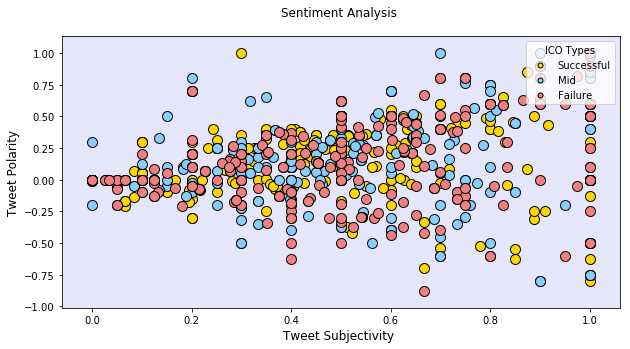

In [55]:
# Create data
fig = plt.figure(figsize=(10,5))
ax = fig.add_subplot(1, 1, 1,facecolor='lavender')



colors = ["gold", "lightskyBlue", "lightcoral"]
explode = (0, 0, 0.05)

g1 = (Success.loc[(Success['Status'] == 'Successful'),['Subjectivity']], Success.loc[(Success['Status'] == 'Successful'),['Polarity']])
g2 = (Mid_Success.loc[(Mid_Success['Status'] == 'Mid'),['Subjectivity']], Mid_Success.loc[(Mid_Success['Status'] == 'Mid'),['Polarity']])
g3 = (Failure.loc[(Failure['Status'] == 'Failure'),['Subjectivity']], Failure.loc[(Failure['Status'] == 'Failure'),['Polarity']])


 
data = (g1, g2,g3)
groups = File['Status'].unique()

# Create plot 
for data, color, group in zip(data, colors, groups):
    x, y= data
    ax.scatter(x, y, 
               alpha=1.0, 
               c=color, 
               edgecolors='black', 
               s=100, 
               label=group)

plt.title('Sentiment Analysis ',y=1.05, fontsize = 12.0)
plt.xlabel('Tweet Subjectivity ',fontsize = 12.0)
plt.ylabel('Tweet Polarity',fontsize = 12.0)
plt.legend(title = "ICO Types", loc=1, markerscale = 0.5, fontsize = 10.0)
# plt.text(40,15,"Note: Circle size corelates with driver count per city", va = 'top',ha = 'left',fontsize=12.0)
# sns.set_style('darkgrid')
plt.savefig("bubbleplot.png")
plt.show()

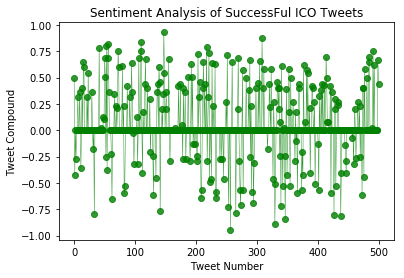

In [60]:
# Create plot
plt.plot(np.arange(len(Success["Compound"])),
         Success["Compound"], marker="o", linewidth=0.5,
         alpha=0.8, color = 'green')

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of SuccessFul ICO Tweets")
plt.ylabel("Tweet Compound")
plt.xlabel("Tweet Number")
plt.show()

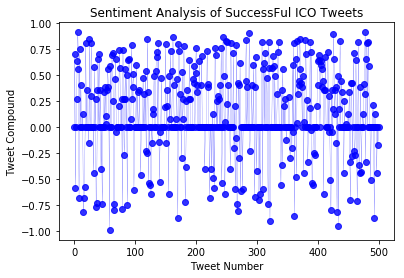

In [64]:
# Create plot
plt.plot(np.arange(len(Mid_Success["Compound"])),
         Mid_Success["Compound"], marker="o", linewidth=0.2,
         alpha=0.8, color = 'blue')

# # Incorporate the other graph properties
plt.title("Sentiment Analysis of Mid - SuccessFul ICO Tweets")
plt.ylabel("Tweet Compound")
plt.xlabel("Tweet Number")
plt.show()

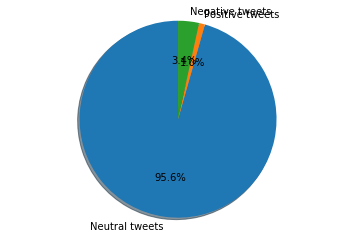

In [61]:
positive_polarity = [p for p in Success['Postivity'] if p>0.5]
negative_polarity = [n for n in Success['Negativity'] if n<0.5]
neutral_polarity = [r for r in Success['Neutral'] if r==0]


total_size = len(positive_polarity) + len(negative_polarity) + len(neutral_polarity)
n_size = len(negative_polarity)/total_size
p_size = len(positive_polarity)/total_size
r_size = len(neutral_polarity)/total_size


labels = ['Neutral tweets', 'Positive tweets', 'Negative tweets']
sizes = [r_size, p_size, n_size]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

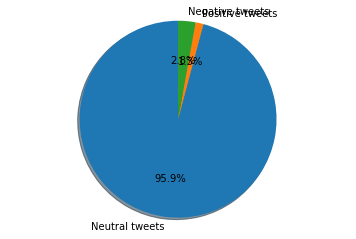

In [65]:
positive_polarity = [p for p in Mid_Success['Postivity'] if p>0.5]
negative_polarity = [n for n in Mid_Success['Negativity'] if n<0.5]
neutral_polarity = [r for r in Mid_Success['Neutral'] if r==0]


total_size = len(positive_polarity) + len(negative_polarity) + len(neutral_polarity)
n_size = len(negative_polarity)/total_size
p_size = len(positive_polarity)/total_size
r_size = len(neutral_polarity)/total_size


labels = ['Neutral tweets', 'Positive tweets', 'Negative tweets']
sizes = [r_size, p_size, n_size]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()